# Data Exploration
# Importing Libraries

In [1]:
!pip install tensorflow_decision_forests
!pip install keras-tuner
print("Download Complete!")

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.10.1 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.61.0 which is incompatible.
tfx-bsl 1.10.1 requires pyarrow<7,>=6, but you have pyarrow 9.0.0 which is incompatible.
tensorflow-transform 1.10.1 requires pyarrow<7,>=6, but you have pyarrow 9.0.0 which is incompatible.
tensorflow-serving-api 2.10.0 requires tensorflow<3,>=2.10.0, but you have tensorflow 2.9.2 which is incompatible.
ortools 9.5.2237 requires protobuf>=4.21.5, but you

In [2]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf

import matplotlib.pyplot as plt
import seaborn as sns

print("Importing Libraries Completed")

Importing Libraries Completed


# Importing Dataset

In [3]:
path_train = "../input/disease-prediction-using-machine-learning/Training.csv"
path_test = "../input/disease-prediction-using-machine-learning/Testing.csv"

train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

print(train_df.shape)
print(test_df.shape)
print("Dataset Loaded")

(4920, 134)
(42, 133)
Dataset Loaded


# Exploring and Cleaning the Dataset

In [4]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


The feature `Unnamed: 133` has all values as `NaN`, so we can drop it.

In [6]:
train_df.drop('Unnamed: 133', axis = 1, inplace = True)

In [7]:
train_df.shape

(4920, 133)

Setting pandas to display all the *columns* and *rows*

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [9]:
train_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.0,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.046341,0.209756,0.1

In [10]:
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         4920 non-null   int64 
 1    skin_rash                       4920 non-null   int64 
 2    nodal_skin_eruptions            4920 non-null   int64 
 3    continuous_sneezing             4920 non-null   int64 
 4    shivering                       4920 non-null   int64 
 5    chills                          4920 non-null   int64 
 6    joint_pain                      4920 non-null   int64 
 7    stomach_pain                    4920 non-null   int64 
 8    acidity                         4920 non-null   int64 
 9    ulcers_on_tongue                4920 non-null   int64 
 10   muscle_wasting                  4920 non-null   int64 
 11   vomiting                        4920 non-null   int64 
 12   burning_micturition             

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


We have zero `Null` values

In [11]:
train_df.isnull().sum().any()

False

Count plot of the column `prognosis`

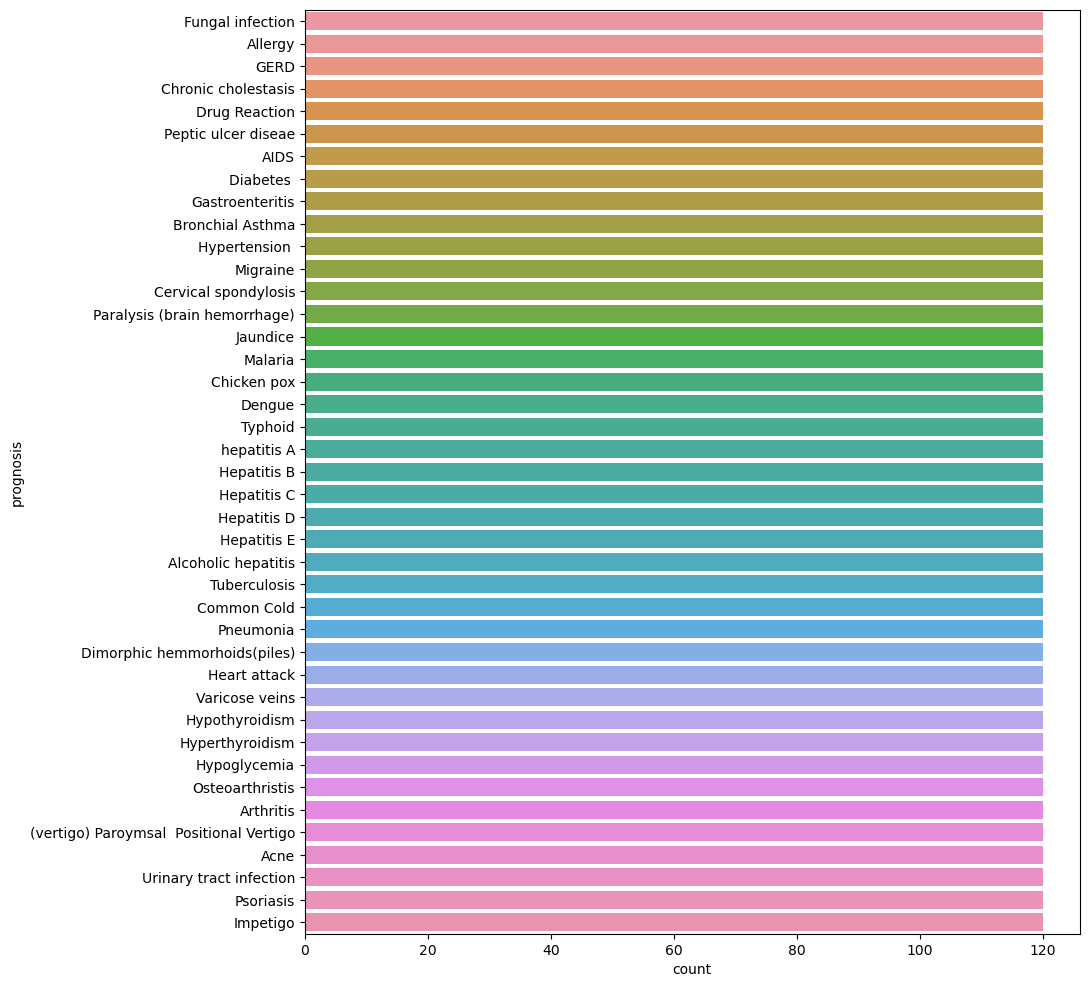

In [12]:
plt.figure(figsize = (10, 12))
countPlot = sns.countplot(y = 'prognosis', data = train_df)
plt.show()

## Label Encoding

In [13]:
label = 'prognosis'
classes = list(train_df[label].unique())
print(f"Label Classes : {classes}")

train_df[label] = train_df[label].map(classes.index)
test_df[label] = test_df[label].map(classes.index)

Label Classes : ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


# Creating some models for this dataset

## CART Model
Using the default parameters

In [14]:
tf_train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label = label)
cart = tfdf.keras.CartModel()
cart.fit(tf_train_ds)

/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)
2023-02-16 06:23:10.245764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-16 06:23:10.245835: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Use /tmp/tmpzv2guk9z as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.350679. Found 4920 examples.
Training model...
Model trained in 0:00:00.077561
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpzv2guk9z/model/ with prefix 9cfdbf0c9d844c19
[INFO abstract_model.cc:1248] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [15]:
tfdf.model_plotter.plot_model_in_colab(cart)

### Model Evaluation

In [16]:
cart.compile("accuracy")
print("Train evaluation: ", cart.evaluate(tf_train_ds, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
print("Test evaluation: ", cart.evaluate(tf_test_dataset, return_dict=True))

5/5 [==============================] - 1s 73ms/step - loss: 0.0000e+00 - accuracy: 0.9512
Train evaluation:  {'loss': 0.0, 'accuracy': 0.9512194991111755}
1/1 [==============================] - 0s 203ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}


In [17]:
cart.summary()

Model: "cart_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (132):
	abdominal_pain
	abnormal_menstruation
	acidity
	acute_liver_failure
	altered_sensorium
	anxiety
	back_pain
	belly_pain
	blackheads
	bladder_discomfort
	blister
	blood_in_sputum
	bloody_stool
	blurred_and_distorted_vision
	breathlessness
	brittle_nails
	bruising
	burning_micturition
	chest_pain
	chills
	cold_hands_and_feets
	coma
	congestion
	constipation
	continuous_feel_of_urine
	continuous_sneezing
	cough
	cramps
	dark_urine
	dehydration
	depression
	diarrhoea
	dischromic__patches
	distention_of_abdomen
	dizziness
	drying_and_tingling_lips
	enlarged_thyroid
	excessive_hunger
	extra_marital_contacts
	family_history
	fast_heart_ra

## Random Forest

In [18]:
rf = tfdf.keras.RandomForestModel()
rf.fit(tf_train_ds, compute_oob_performances=True, compute_oob_variable_importances=True)

Use /tmp/tmp3rkcx013 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.017669. Found 4920 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp3rkcx013/model/ with prefix 93378461fcf94bce


Model trained in 0:00:03.331793
Compiling model...


[INFO abstract_model.cc:1248] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [19]:
rf.compile("accuracy")
print("Train evaluation: ", rf.evaluate(tf_train_ds, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
print("Test evaluation: ", rf.evaluate(tf_test_dataset, return_dict=True))

5/5 [==============================] - 1s 79ms/step - loss: 0.0000e+00 - accuracy: 0.9976
Train evaluation:  {'loss': 0.0, 'accuracy': 0.997560977935791}
1/1 [==============================] - 0s 210ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}


In [20]:
rf.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (132):
	abdominal_pain
	abnormal_menstruation
	acidity
	acute_liver_failure
	altered_sensorium
	anxiety
	back_pain
	belly_pain
	blackheads
	bladder_discomfort
	blister
	blood_in_sputum
	bloody_stool
	blurred_and_distorted_vision
	breathlessness
	brittle_nails
	bruising
	burning_micturition
	chest_pain
	chills
	cold_hands_and_feets
	coma
	congestion
	constipation
	continuous_feel_of_urine
	continuous_sneezing
	cough
	cramps
	dark_urine
	dehydration
	depression
	diarrhoea
	dischromic__patches
	distention_of_abdomen
	dizziness
	drying_and_tingling_lips
	enlarged_thyroid
	excessive_hunger
	extra_marital_contacts
	family_history
	fast

## Gradient Boosted Decision Trees

In [21]:
gbdt = tfdf.keras.GradientBoostedTreesModel()
gbdt.fit(tf_train_ds, compute_oob_performances=True, compute_oob_variable_importances=True)

Use /tmp/tmpe1cpjbpt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.781676. Found 4920 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpe1cpjbpt/model/ with prefix 4af5f346044f4b33


Model trained in 0:07:34.998559
Compiling model...


[INFO abstract_model.cc:1248] Engine "GradientBoostedTreesGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [22]:
gbdt.compile("accuracy")
print("Train evaluation: ", gbdt.evaluate(tf_train_ds, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
print("Test evaluation: ", gbdt.evaluate(tf_test_dataset, return_dict=True))

5/5 [==============================] - 2s 246ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Train evaluation:  {'loss': 0.0, 'accuracy': 1.0}
1/1 [==============================] - 0s 229ms/step - loss: 0.0000e+00 - accuracy: 0.9762
Test evaluation:  {'loss': 0.0, 'accuracy': 0.976190447807312}


## Removing Duplicates

In [23]:
duplicate_rows = train_df[train_df.duplicated()]
print("Number of Duplicates = ",duplicate_rows.shape[0])

Number of Duplicates =  4616


Dropping the duplicates

In [24]:
train_df.drop_duplicates(inplace=True)
train_df.shape

(304, 133)

We're left with $304$ unique datapoints.

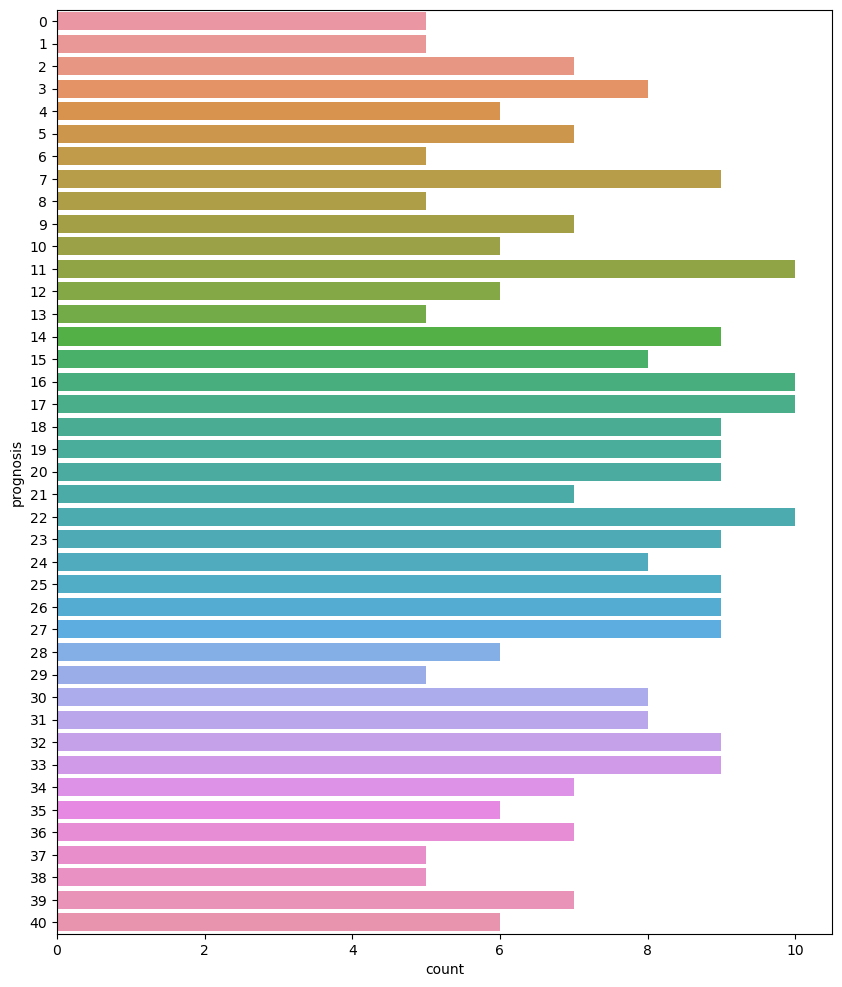

In [25]:
plt.figure(figsize = (10,12))
countPlot = sns.countplot(y = 'prognosis', data = train_df)
plt.show()

In [26]:
train_df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Selection

## Checking out the Correlated Features

Text(0.5, 1.0, 'Correlation Matrix')

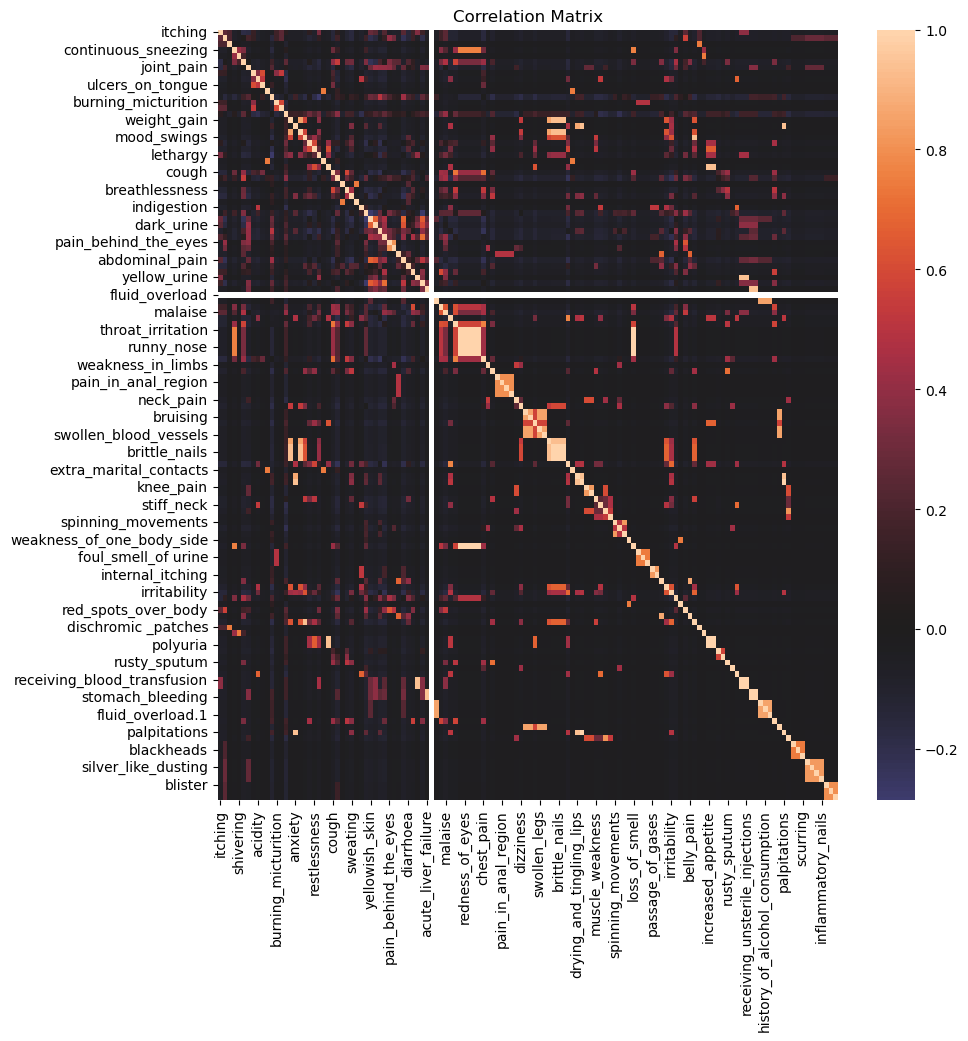

In [27]:
plt.figure(figsize = (10,10))
corrMatrix = sns.heatmap(train_df.loc[:,train_df.columns!=label].corr(method = 'spearman'), center = 0.0, linecolor = 'k')
corrMatrix.set_title("Correlation Matrix")

### Removing Highly Correlated Features

In [28]:
def correlated(data, thresh):
    correlated_columns = set() # Set containing names of correlated columns/features
    corrMatrix = data.corr()
    cols = corrMatrix.columns
    for i in range(cols.shape[0]):
        for j in range(i):
            if abs(corrMatrix.iloc[i, j]) > thresh:
                correlated_columns.add(cols[i])
    return correlated_columns

In [29]:
correlated_feats = correlated(train_df, 0.9)
len(correlated_feats)

17

In [30]:
correlated_feats

{'abnormal_menstruation',
 'brittle_nails',
 'coma',
 'congestion',
 'enlarged_thyroid',
 'increased_appetite',
 'loss_of_smell',
 'palpitations',
 'polyuria',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'redness_of_eyes',
 'runny_nose',
 'sinus_pressure',
 'slurred_speech',
 'stomach_bleeding',
 'swollen_extremeties'}

In [31]:
x_train_unco =  train_df.drop(labels = correlated_feats, axis = 1)
x_test_unco = test_df.drop(labels = correlated_feats, axis = 1)
print(x_train_unco.shape, x_test_unco.shape)

(304, 116) (42, 116)


In [32]:
train_df = x_train_unco
test_df = x_test_unco


Text(0.5, 1.0, 'Correlation Matrix')

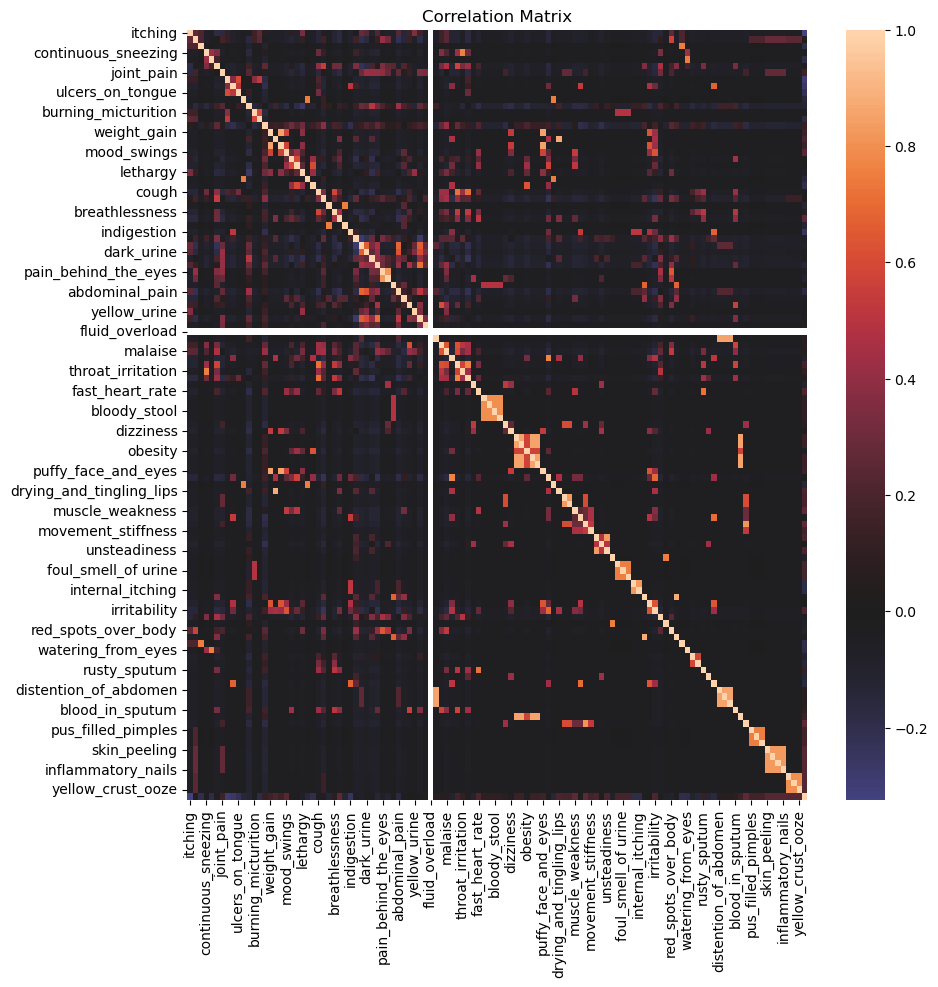

In [33]:
plt.figure(figsize = (10,10))
corrMatrix = sns.heatmap(train_df.corr(method = 'spearman'), center = 0.0, linecolor = 'k')
corrMatrix.set_title("Correlation Matrix")

In [34]:
tf_train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label = label)

cart = tfdf.keras.CartModel()
cart.fit(tf_train_ds)

Use /tmp/tmpj48_jwdf as temporary training directory
Reading training dataset...


/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


Training dataset read in 0:00:01.321474. Found 304 examples.
Training model...
Model trained in 0:00:00.013777
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpj48_jwdf/model/ with prefix bcf7e0364e9041b4
[INFO abstract_model.cc:1248] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [35]:
rf = tfdf.keras.RandomForestModel()
rf.fit(tf_train_ds, compute_oob_performances=True, compute_oob_variable_importances=True)

Use /tmp/tmp7ifmr1vs as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.279227. Found 304 examples.
Training model...
Model trained in 0:00:00.523818
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp7ifmr1vs/model/ with prefix 43215f60d7aa495a
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [36]:
gbdt = tfdf.keras.GradientBoostedTreesModel()
gbdt.fit(tf_train_ds, compute_oob_performances=True, compute_oob_variable_importances=True)

Use /tmp/tmppv_lbg_l as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.220048. Found 304 examples.
Training model...
Model trained in 0:00:16.875410
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmppv_lbg_l/model/ with prefix f7572164618043e2
[INFO abstract_model.cc:1248] Engine "GradientBoostedTreesGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [37]:
cart.compile("accuracy")
print("Train evaluation: ", cart.evaluate(tf_train_ds, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
print("Test evaluation: ", cart.evaluate(tf_test_dataset, return_dict=True))

1/1 [==============================] - 1s 602ms/step - loss: 0.0000e+00 - accuracy: 0.5921
Train evaluation:  {'loss': 0.0, 'accuracy': 0.5921052694320679}
1/1 [==============================] - 0s 222ms/step - loss: 0.0000e+00 - accuracy: 0.6190
Test evaluation:  {'loss': 0.0, 'accuracy': 0.6190476417541504}


In [38]:
rf.compile("accuracy")
print("Train evaluation: ", rf.evaluate(tf_train_ds, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
print("Test evaluation: ", rf.evaluate(tf_test_dataset, return_dict=True))

1/1 [==============================] - 0s 265ms/step - loss: 0.0000e+00 - accuracy: 0.9803
Train evaluation:  {'loss': 0.0, 'accuracy': 0.9802631735801697}
1/1 [==============================] - 0s 192ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}


In [39]:
gbdt.compile("accuracy")
print("Train evaluation: ", gbdt.evaluate(tf_train_ds, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
print("Test evaluation: ", gbdt.evaluate(tf_test_dataset, return_dict=True))

1/1 [==============================] - 0s 274ms/step - loss: 0.0000e+00 - accuracy: 0.9704
Train evaluation:  {'loss': 0.0, 'accuracy': 0.9703947305679321}
1/1 [==============================] - 0s 200ms/step - loss: 0.0000e+00 - accuracy: 0.9762
Test evaluation:  {'loss': 0.0, 'accuracy': 0.976190447807312}


In [40]:
rf.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (115):
	abdominal_pain
	acidity
	acute_liver_failure
	altered_sensorium
	anxiety
	back_pain
	belly_pain
	blackheads
	bladder_discomfort
	blister
	blood_in_sputum
	bloody_stool
	blurred_and_distorted_vision
	breathlessness
	bruising
	burning_micturition
	chest_pain
	chills
	cold_hands_and_feets
	constipation
	continuous_feel_of_urine
	continuous_sneezing
	cough
	cramps
	dark_urine
	dehydration
	depression
	diarrhoea
	dischromic__patches
	distention_of_abdomen
	dizziness
	drying_and_tingling_lips
	excessive_hunger
	extra_marital_contacts
	family_history
	fast_heart_rate
	fatigue
	fluid_overload
	fluid_overload.1
	foul_smell_of_ur

In [41]:
gbdt.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (115):
	abdominal_pain
	acidity
	acute_liver_failure
	altered_sensorium
	anxiety
	back_pain
	belly_pain
	blackheads
	bladder_discomfort
	blister
	blood_in_sputum
	bloody_stool
	blurred_and_distorted_vision
	breathlessness
	bruising
	burning_micturition
	chest_pain
	chills
	cold_hands_and_feets
	constipation
	continuous_feel_of_urine
	continuous_sneezing
	cough
	cramps
	dark_urine
	dehydration
	depression
	diarrhoea
	dischromic__patches
	distention_of_abdomen
	dizziness
	drying_and_tingling_lips
	excessive_hunger
	extra_marital_contacts
	family_history
	fast_heart_rate
	fatigue
	fluid_overload
	fluid_overload.1